In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [2]:
! pip install h2o

     |████████████████████████████████| 129.4MB 93kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.2-py2.py3-none-any.whl size=129446949 sha256=adc143239c1518143b933bd77fdfd64f695c47d11957a9e2ece57a562f8dc39e
  Stored in directory: /root/.cache/pip/wheels/c6/be/83/a33a3c1c97fce1d136222bf4ed6d79da405ef6103f5b434c1e
Successfully built h2o


In [3]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads = -1)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpozdldjw1
  JVM stdout: /tmp/tmpozdldjw1/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpozdldjw1/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_unknownUser_xns7c4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = h2o.import_file('/content/drive/My Drive/Code Tedesco2/mz3_tpi.txt')
df.head(2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


tpi,blue,green,red,nir,yield
0.06039,488,568,522,3672,215.89
0.06039,504,581,533,3665,222.37


In [6]:
y = "yield"

In [7]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [8]:
aml = H2OAutoML(max_runtime_secs=3600, seed = 1, project_name = 'mz3_tpi', nfolds=5)
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [9]:
aml.leaderboard.head()

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_grid__1_AutoML_20200917_010231_model_8,161.629,12.7134,161.629,8.97623,0.0705173
StackedEnsemble_AllModels_AutoML_20200917_010231,162.675,12.7544,162.675,9.0057,0.0709107
StackedEnsemble_BestOfFamily_AutoML_20200917_010231,163.363,12.7813,163.363,9.03056,0.0710488
GBM_grid__1_AutoML_20200917_010231_model_22,167.925,12.9586,167.925,9.09005,0.0715636
GBM_grid__1_AutoML_20200917_010231_model_23,168.471,12.9797,168.471,9.15467,0.0718073
XGBoost_grid__1_AutoML_20200917_010231_model_9,168.961,12.9985,168.961,9.22911,0.0717869
GBM_grid__1_AutoML_20200917_010231_model_34,171.229,13.0854,171.229,9.18654,0.0725874
GBM_grid__1_AutoML_20200917_010231_model_25,171.593,13.0993,171.593,9.26975,0.0724391
XGBoost_grid__1_AutoML_20200917_010231_model_14,173,13.153,173,9.19736,0.0729796
GBM_grid__1_AutoML_20200917_010231_model_39,173.192,13.1602,173.192,9.2448,0.0728525


In [10]:
perf = aml.leader.model_performance(train)
perf


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 48.01354841721184
RMSE: 6.929180934079571
MAE: 4.774536451545223
RMSLE: 0.041999128890116
Mean Residual Deviance: 48.01354841721184


In [11]:
perf = aml.leader.model_performance(test)
perf


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 161.62949826766976
RMSE: 12.713359047382786
MAE: 8.976233364017943
RMSLE: 0.07051733547860813
Mean Residual Deviance: 161.62949826766976


In [12]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL',)
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
XGBoost_grid__1_AutoML_20200917_010231_model_8,161.629,12.7134,161.629,8.97623,0.0705173,11247,0.020766
StackedEnsemble_AllModels_AutoML_20200917_010231,162.675,12.7544,162.675,9.0057,0.0709107,3498,0.08258
StackedEnsemble_BestOfFamily_AutoML_20200917_010231,163.363,12.7813,163.363,9.03056,0.0710488,1317,0.050339
GBM_grid__1_AutoML_20200917_010231_model_22,167.925,12.9586,167.925,9.09005,0.0715636,4468,0.031143
GBM_grid__1_AutoML_20200917_010231_model_23,168.471,12.9797,168.471,9.15467,0.0718073,7527,0.084615
XGBoost_grid__1_AutoML_20200917_010231_model_9,168.961,12.9985,168.961,9.22911,0.0717869,38857,0.024766
GBM_grid__1_AutoML_20200917_010231_model_34,171.229,13.0854,171.229,9.18654,0.0725874,5846,0.056098
GBM_grid__1_AutoML_20200917_010231_model_25,171.593,13.0993,171.593,9.26975,0.0724391,4571,0.042211
XGBoost_grid__1_AutoML_20200917_010231_model_14,173,13.153,173,9.19736,0.0729796,52257,0.025903
GBM_grid__1_AutoML_20200917_010231_model_39,173.192,13.1602,173.192,9.2448,0.0728525,3623,0.034741


In [13]:
pred = aml.leader.predict(test)
pred

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict
215.68
214.654
223.316
215.868
210.922
202.059
204.527
204.306
193.43
197.139


In [14]:
obs = h2o.as_list(test["yield"])
pred = h2o.as_list(pred["predict"])

In [15]:
import pandas as pd
automl = pd.DataFrame({'Actual': obs["yield"], 'Predicted': pred["predict"]})
automl

,Actual,Predicted
0,222.110000,215.680466
1,218.750000,214.654205
2,229.740000,223.316162
3,208.080000,215.867844
4,214.660000,210.921707
...,...,...
11140,255.370102,219.635361
11141,256.774987,220.511978
11142,263.258479,215.224655
11143,263.806607,203.373032


In [16]:
automl.to_csv(r'/content/drive/My Drive/Code Tedesco2/mz3_tpi_pred.txt', index=None, sep='\t', mode='a')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


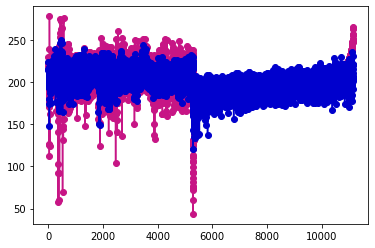

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot('Actual', data=automl, marker='o', color='mediumvioletred')
plt.plot('Predicted', data=automl, marker='o', color='mediumblue')
plt.show()

In [18]:
test_map = h2o.import_file('/content/drive/My Drive/Code Tedesco2/mz3_2018_tpi.txt')
test_map.head(2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


tpi,blue,green,red,nir,yield
0.13447,5589,4775,3225,11528,20.6634
0.15787,5546,4759,3216,11542,21.685


In [19]:
pred_test_map = aml.leader.model_performance(test_map)
pred_test_map


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 72.45539375324209
RMSE: 8.512073410940609
MAE: 5.629033876317627
RMSLE: 0.05167314700009503
Mean Residual Deviance: 72.45539375324209


In [20]:
pred_test = aml.leader.predict(test_map)
pred_test

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict
111.856
107.905
117.833
120.063
188.722
107.466
112.159
131.424
122.827
136.589


In [21]:
pred_map = h2o.as_list(pred_test["predict"])
pred_map

,predict
0,111.856415
1,107.905441
2,117.832748
3,120.063148
4,188.721909
...,...
28782,243.151779
28783,247.066696
28784,226.014526
28785,244.882156


In [22]:
import pandas as pd
automl_map = pd.DataFrame({'Predicted': pred_map["predict"]})
automl_map

,Predicted
0,111.856415
1,107.905441
2,117.832748
3,120.063148
4,188.721909
...,...
28782,243.151779
28783,247.066696
28784,226.014526
28785,244.882156


In [23]:
automl_map.to_csv(r'/content/drive/My Drive/Code Tedesco2/mz3_2018_tpi_m_pred18.txt', index=None, sep='\t', mode='a')


In [24]:
test_map2 = h2o.import_file('/content/drive/My Drive/Code Tedesco2/mz3_2019_tpi.txt')
test_map2.head(2)

Parse progress: |█████████████████████████████████████████████████████████| 100%


tpi,blue,green,red,nir,yield
0.06039,488,568,522,3672,215.89
0.06039,504,581,533,3665,222.37


In [25]:
pred_test_map2 = aml.leader.model_performance(test_map2)
pred_test_map2


ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 68.89391505400583
RMSE: 8.30023584327613
MAE: 5.599500999997137
RMSLE: 0.046075910381509745
Mean Residual Deviance: 68.89391505400583


In [26]:
pred_test2 = aml.leader.predict(test_map2)
pred_test2

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict
212.877
214.614
215.68
212.362
222.045
217.446
219.437
212.02
210.494
214.654


In [27]:
pred_map2 = h2o.as_list(pred_test2["predict"])
pred_map2

,predict
0,212.876984
1,214.613708
2,215.680466
3,212.361771
4,222.045288
...,...
26941,223.531464
26942,221.353622
26943,223.984680
26944,220.843643


In [28]:
import pandas as pd
automl_map2 = pd.DataFrame({'Predicted': pred_map2["predict"]})
automl_map2

,Predicted
0,212.876984
1,214.613708
2,215.680466
3,212.361771
4,222.045288
...,...
26941,223.531464
26942,221.353622
26943,223.984680
26944,220.843643


In [29]:
automl_map2.to_csv(r'/content/drive/My Drive/Code Tedesco2/mz3_2019_tpi_m_pred19.txt', sep='\t', mode='a')